En este notebook se realizará un análisis de las matriculaciones de turismos durante los últimos 10 años en España. Los datos se extraerán de la web de datosmacro (Link: https://datosmacro.expansion.com/negocios/matriculaciones-vehiculos/espana?anio=2021) utilizando las librerías Beautifulsoup y Selenium

In [1]:
# Importamos las librerías que necesitamos:

# Beautifulsoup
from bs4 import BeautifulSoup

# Requests
import requests

# Importar librerías para automatización de navegadores web con Selenium
# -----------------------------------------------------------------------
from selenium import webdriver  # Selenium es una herramienta para automatizar la interacción con navegadores web.
from webdriver_manager.chrome import ChromeDriverManager  # ChromeDriverManager gestiona la instalación del controlador de Chrome.
from selenium.webdriver.common.keys import Keys  # Keys es útil para simular eventos de teclado en Selenium.
from selenium.webdriver.support.ui import Select  # Select se utiliza para interactuar con elementos <select> en páginas web.
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException # Excepciones comunes de selenium que nos podemos encontrar 


# Importar librerías para pausar la ejecución
# -----------------------------------------------------------------------
from time import sleep  # Sleep se utiliza para pausar la ejecución del programa por un número de segundos.

# Librerías para tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

#Librerias de soporte
#-------------------------------------------------------------------------
import warnings
import sys
sys.path.append("../")
from src import soporte
import json
from tqdm import tqdm
warnings.filterwarnings("ignore")

#Librería para hacer visualización rápida 
#--------------------------------------------------------------------------
import seaborn as sns

In [2]:
#Comenzamos accediendo a la página para obtener los datos, los unimos todos en un df grande
df_datosmacro = pd.DataFrame()
for i in range(2002,2026):
    url_datosmacro = f"https://datosmacro.expansion.com/negocios/matriculaciones-vehiculos/espana?anio={i}"
    tabla = soporte.sacar_historico(url_datosmacro,0)
    df_datosmacro = pd.concat([df_datosmacro,tabla.iloc[:-1]])


<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>


In [3]:
#Chequeamos que los meses se hayan unido correctamente
df_datosmacro.head(15)

,Fecha,Vehículos comerciales Mes,Vehículos pasajeros Mes,Venta mensual vehículos,Vehículos Mes/1000 hab.,Vehículos comerciales Año,Vehículos pasajeros Año,Venta anual vehículos,Vehículos Año/1000 hab.
0,Diciembre 2002,21.249,121.139,140.550,"3,36",235.745,1.405.275,1.636.940,"39,14"
1,Noviembre 2002,19.666,103.865,123.528,"2,98",232.876,1.398.409,1.629.043,"39,33"
2,Octubre 2002,22.415,118.428,140.843,"3,40",234.141,1.408.361,1.640.310,"39,60"
3,Septiembre 2002,15.250,85.945,101.195,"2,44",233.250,1.408.514,1.639.572,"39,58"
4,Agosto 2002,13.842,84.795,98.637,"2,38",234.276,1.412.047,1.644.131,"39,69"
5,Julio 2002,25.268,160.098,182.908,"4,42",235.515,1.421.330,1.654.653,"39,94"
6,Junio 2002,19.652,132.196,151.848,"3,67",232.137,1.431.198,1.663.672,"40,16"
7,Mayo 2002,21.566,134.088,155.993,"3,80",234.831,1.456.323,1.691.491,"41,22"
8,Abril 2002,20.066,119.251,139.281,"3,39",236.471,1.465.007,1.701.476,"41,46"
9,Marzo 2002,19.825,133.217,153.042,"3,73",236.873,1.473.886,1.710.793,"41,69"


In [4]:
#Comenzamos a adecuar los datos de nuestro Dataframe:
df_datosmacro = df_datosmacro.applymap(soporte.eliminar_puntos)

#Pasamos los no decimales a int

df_datosmacro["Vehículos comerciales Mes"] = df_datosmacro["Vehículos comerciales Mes"].astype(int)
df_datosmacro["Vehículos pasajeros Mes"] = df_datosmacro["Vehículos pasajeros Mes"].astype(int)
df_datosmacro["Venta mensual vehículos"] = df_datosmacro["Venta mensual vehículos"].astype(int)
df_datosmacro["Vehículos comerciales Año"] = df_datosmacro["Vehículos comerciales Año"].astype(int)
df_datosmacro["Vehículos pasajeros Año"] = df_datosmacro["Vehículos pasajeros Año"].astype(int)
df_datosmacro["Venta anual vehículos"] = df_datosmacro["Venta anual vehículos"].astype(int)


df_datosmacro.dtypes

Fecha                        object
Vehículos comerciales Mes     int64
Vehículos pasajeros Mes       int64
Venta mensual vehículos       int64
Vehículos Mes/1000 hab.      object
Vehículos comerciales Año     int64
Vehículos pasajeros Año       int64
Venta anual vehículos         int64
Vehículos Año/1000 hab.      object
dtype: object

In [5]:
#Pasamos los decimales a float

df_datosmacro["Vehículos Mes/1000 hab."] = df_datosmacro["Vehículos Mes/1000 hab."].astype(str)
df_datosmacro["Vehículos Año/1000 hab."] = df_datosmacro["Vehículos Año/1000 hab."].astype(str)

df_datosmacro["Vehículos Mes/1000 hab."] = df_datosmacro["Vehículos Mes/1000 hab."].apply(soporte.eliminar_comas)
df_datosmacro["Vehículos Año/1000 hab."] = df_datosmacro["Vehículos Año/1000 hab."].apply(soporte.eliminar_comas)

df_datosmacro["Vehículos Mes/1000 hab."] = df_datosmacro["Vehículos Mes/1000 hab."].astype(float)
df_datosmacro["Vehículos Año/1000 hab."] = df_datosmacro["Vehículos Año/1000 hab."].astype(float)

df_datosmacro.dtypes

Fecha                         object
Vehículos comerciales Mes      int64
Vehículos pasajeros Mes        int64
Venta mensual vehículos        int64
Vehículos Mes/1000 hab.      float64
Vehículos comerciales Año      int64
Vehículos pasajeros Año        int64
Venta anual vehículos          int64
Vehículos Año/1000 hab.      float64
dtype: object

In [6]:
#Creamos un diccionario para poder pasar correctamente a formato fecha

meses_dict = {
    "Enero": "January",
    "Febrero": "February",
    "Marzo": "March",
    "Abril": "April",
    "Mayo": "May",
    "Junio": "June",
    "Julio": "July",
    "Agosto": "August",
    "Septiembre": "September",
    "Octubre": "October",
    "Noviembre": "November",
    "Diciembre": "December"
}

In [7]:
# Convertir la columna 'fecha' a tipo datetime

for k,v in meses_dict.items():
    df_datosmacro["Fecha"] = df_datosmacro["Fecha"].str.replace(k,v)
df_datosmacro['Fecha'] = pd.to_datetime(df_datosmacro['Fecha'], format='%B %Y')


In [8]:
#Visualizamos que todo esté correcto en el DF antes de pasar a CSV
df_datosmacro

,Fecha,Vehículos comerciales Mes,Vehículos pasajeros Mes,Venta mensual vehículos,Vehículos Mes/1000 hab.,Vehículos comerciales Año,Vehículos pasajeros Año,Venta anual vehículos,Vehículos Año/1000 hab.
0,2002-12-01,21249,121139,140550,3.36,235745,1405275,1636940,39.14
1,2002-11-01,19666,103865,123528,2.98,232876,1398409,1629043,39.33
2,2002-10-01,22415,118428,140843,3.40,234141,1408361,1640310,39.60
3,2002-09-01,15250,85945,101195,2.44,233250,1408514,1639572,39.58
4,2002-08-01,13842,84795,98637,2.38,234276,1412047,1644131,39.69
...,...,...,...,...,...,...,...,...,...
7,2024-02-01,15907,81348,96862,1.99,182918,961353,1140353,23.45
8,2024-01-01,14186,68685,82592,1.70,180435,954006,1130691,23.25
9,2023-12-01,15757,81772,97251,2.00,178370,949359,1124076,23.11
10,2023-11-01,17815,78314,95749,1.98,177046,941497,1114902,23.04


In [9]:
ruta_csv = "C:\\Users\\Víctor\\Desktop\\HACKIO\\Proyecto5\\Datos\\CSVs\\historico_matriculaciones.csv"

df_datosmacro.to_csv(ruta_csv, index= False, encoding= "utf-8")

<Axes: xlabel='Fecha', ylabel='Vehículos pasajeros Mes'>

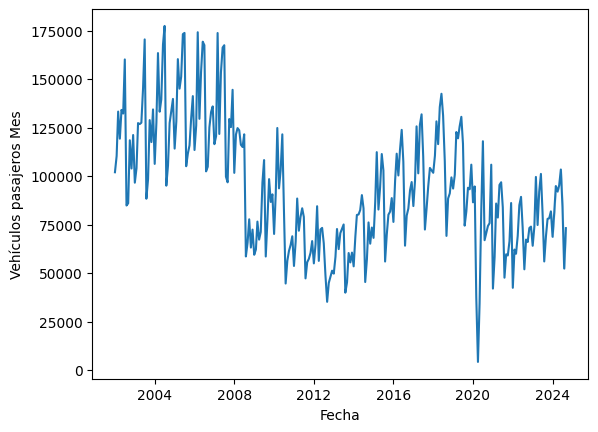

In [10]:
#Chequeamos visualmente que nuestros datos están bien ordenados. Ya de primeras vemos estacionalidad...
sns.lineplot(data = df_datosmacro, x = "Fecha", y = "Vehículos pasajeros Mes")